## Hello World in Deep Learning (MNIST Classification)

In [1]:
# Imports
import datetime, os
#os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
import numpy as np
import tensorflow as tf
#tf.get_logger().setLevel('ERROR')
import matplotlib.pyplot as plt
%matplotlib inline
from tensorflow.keras.models import Sequential, Model, clone_model
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Input
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical


2024-11-10 12:06:50.848451: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-11-10 12:06:51.448491: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


### Mnist classification in a nutshell

In the next cell we train a simple fully connected neutal network to classify digits (0-9) form the mnist dataset. We use 20'000 images as our train dataset and 10'000 images are in our testset. Finally we plot the learning cuves and look at some predictions and the accuracy on the testset, you see that we already have an accuracy of around 96%.

In [2]:
(x_digits_train, y_digits_train), (x_digits_test, y_digits_test) = mnist.load_data()

# Make train data smaller
np.random.seed(72)
train_data_idx=np.random.choice(range(0,len(x_digits_train)),20000,replace=False)
x_digits_train=x_digits_train[train_data_idx]
y_digits_train=y_digits_train[train_data_idx]

# Preprocess data 
x_digits_train = x_digits_train.astype('float32') 
x_digits_test = x_digits_test.astype('float32')
x_digits_train = x_digits_train/ 255 
x_digits_test = x_digits_test/ 255
y_digits_train = to_categorical(y_digits_train, 10) 
y_digits_test = to_categorical(y_digits_test, 10)
x_digits_train=x_digits_train.reshape((len(x_digits_train),28,28,1))
x_digits_test=x_digits_test.reshape((len(x_digits_test),28,28,1))

# Define model 
model_digits = Sequential()
model_digits.add(Input(shape=(28,28,1)))
model_digits.add(Flatten()) 
model_digits.add(Dense(500, activation='relu')) 
model_digits.add(Dense(50, activation='relu')) 
model_digits.add(Dense(10, activation='softmax')) 

# Compile model
model_digits.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# train model
history=model_digits.fit(x_digits_train, y_digits_train,
                         validation_data=(x_digits_test, y_digits_test),
                         batch_size=128, epochs=10, verbose=1)

2024-11-10 12:06:52.568721: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-11-10 12:06:52.588881: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-11-10 12:06:52.588924: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-11-10 12:06:52.590092: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-11-10 12:06:52.590127: I external/local_xla/xla/stream_executor

Epoch 1/10


I0000 00:00:1731236814.084724   48006 service.cc:145] XLA service 0x7fc7c0007440 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1731236814.084764   48006 service.cc:153]   StreamExecutor device (0): NVIDIA GeForce RTX 4070 Ti SUPER, Compute Capability 8.9
2024-11-10 12:06:54.100399: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-11-10 12:06:54.176722: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:465] Loaded cuDNN version 8907
I0000 00:00:1731236815.245093   48073 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_358', 20 bytes spill stores, 20 bytes spill loads

I0000 00:00:1731236816.068335   48075 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_155', 40 bytes spill stores, 40 bytes spill loads

I00

112/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7491 - loss: 0.8603

I0000 00:00:1731236817.606052   48006 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


156/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7823 - loss: 0.7464

I0000 00:00:1731236818.280287   48190 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_155', 4 bytes spill stores, 4 bytes spill loads

I0000 00:00:1731236818.348514   48197 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_155', 40 bytes spill stores, 40 bytes spill loads



157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7828 - loss: 0.7443

I0000 00:00:1731236820.435596   48283 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_48', 4 bytes spill stores, 4 bytes spill loads



157/157 ━━━━━━━━━━━━━━━━━━━━ 8s 23ms/step - accuracy: 0.7834 - loss: 0.7423 - val_accuracy: 0.9373 - val_loss: 0.2150
Epoch 2/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9521 - loss: 0.1645 - val_accuracy: 0.9534 - val_loss: 0.1541
Epoch 3/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9656 - loss: 0.1107 - val_accuracy: 0.9582 - val_loss: 0.1327
Epoch 4/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9767 - loss: 0.0764 - val_accuracy: 0.9623 - val_loss: 0.1166
Epoch 5/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9871 - loss: 0.0470 - val_accuracy: 0.9651 - val_loss: 0.1166
Epoch 6/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9909 - loss: 0.0332 - val_accuracy: 0.9669 - val_loss: 0.1052
Epoch 7/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9929 - loss: 0.0277 - val_accuracy: 0.9684 - val_loss: 0.1124
Epoch 8/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9947 - loss: 0.0213 - val_accuracy: 0.9710 - val

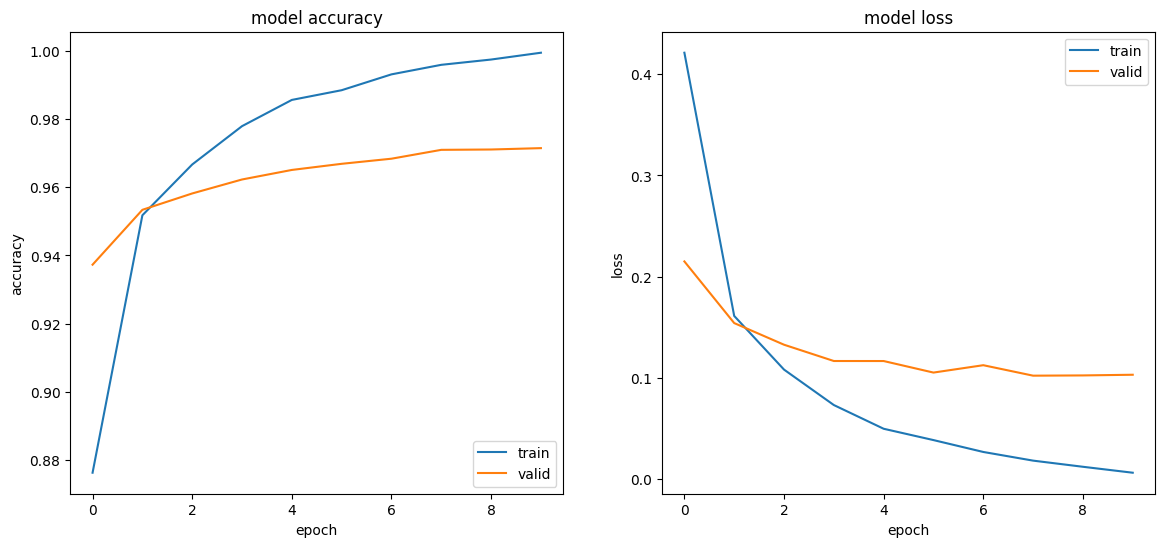

In [3]:
# summarize history for accuracy
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy']) 
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='lower right')
plt.subplot(1,2,2)
plt.plot(history.history['loss']) 
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper right')
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step
predicted probabilities [[2.4458849e-08 1.1569370e-09 3.3433718e-11 7.5552257e-06 2.6384237e-09
  9.9998665e-01 1.9696224e-10 7.8651946e-10 2.9197284e-07 5.4959205e-06]]
max probability 0.99998665
predicted label 5
true label 5


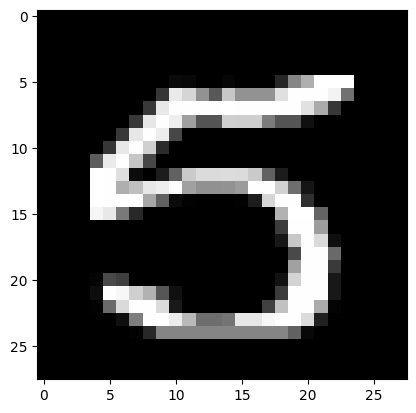

In [4]:
# prediction of an image of the test set
i=np.random.choice(range(0,len(x_digits_test))) 
plt.imshow(x_digits_test[i,:,:,0],cmap="gray")
pred=model_digits.predict(x_digits_test[i:i+1]) 
print("predicted probabilities",pred)
print("max probability",np.max(pred))
print("predicted label",np.argmax(pred))
print("true label",np.argmax(y_digits_test[i]))


In [5]:
# evaluation on the test set
model_digits.evaluate(x_digits_test,y_digits_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9684 - loss: 0.1177


[0.10300864279270172, 0.9714999794960022]

### Mnist classification in more detail

Now let's look at the code above in more detail.
First we load the mnist dataset and look at the size of the train and test dataset. We have 60'000 train images and 10'000 test iamges. The images are greyscale images and the size is 28x28 pixels.

In [6]:
#Load pre-shuffled MNIST data into train and test sets
(x_digits_train, y_digits_train), (x_digits_test, y_digits_test) = mnist.load_data()

In [7]:
print(x_digits_train.shape)
print(x_digits_test.shape)

print(y_digits_train.shape)
print(y_digits_test.shape)


(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


In the next few cells we make the train dataset smaller by sampling 10'000 random images of the 60'000. We look at the distribution of the labels in both datasets and you can see that both dataset are more or less balanced.

In [8]:
np.random.seed(72)
train_data_idx=np.random.choice(range(0,len(x_digits_test)),10000,replace=False)
x_digits_train=x_digits_train[train_data_idx]
y_digits_train=y_digits_train[train_data_idx]
print(x_digits_train.shape)
print(y_digits_train.shape)


(10000, 28, 28)
(10000,)


In [9]:
np.unique(y_digits_train,return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([1001, 1127,  991, 1032,  980,  863, 1014, 1070,  944,  978]))

In [10]:
np.unique(y_digits_test,return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([ 980, 1135, 1032, 1010,  982,  892,  958, 1028,  974, 1009]))

Let's look at the pixelvalues of a train image, you can see that the values are between 0 and 255.  We normalize the values to be in the range from 0 to 1, by values with 255. If you look at the labels, you see that the lables are values form 0 to 9, to train a neural network we need to transform it to the so called one hot encoding. 

In [11]:
#print the pixel values of the first "image"
print(x_digits_train[0])


[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  44 157 241 254 254 254 201 115   3
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0  50 237 254 245 237 237 237 248 254  79
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0 107 242 149  32   0   0   0  96 254 216
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0  24  32   0   0   0   0   0   0 254 237
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 254 237
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   

In [12]:
#print the label of the first "image"
print(y_digits_train[0])


2


In [13]:
# Preprocess data (normalize to be in the range [0,1])
x_digits_train = x_digits_train.astype('float32')
x_digits_test = x_digits_test.astype('float32')
x_digits_train = x_digits_train/ 255
x_digits_test = x_digits_test/ 255

In [14]:
# Preprocess class labels -- one hot encoding
y_digits_train = to_categorical(y_digits_train, 10)
y_digits_test = to_categorical(y_digits_test, 10)

In [15]:
#print the pixel values of the first "image"
# now the values are form 0 to 1
print(x_digits_train[0])


[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.17254902 0.6156863  0.94509804
  0.9960784

In [16]:
#print the label of the first "image"
#the 2 form above, one hot encoded
print(y_digits_train[0])


[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]


In [17]:
print(x_digits_train.shape)
print(x_digits_test.shape)

print(y_digits_train.shape)
print(y_digits_test.shape)


(10000, 28, 28)
(10000, 28, 28)
(10000, 10)
(10000, 10)


Let's plot a few images to get a feeling for the dataset and see how hard the task is.
We plot the first 9 images of the training dataset.

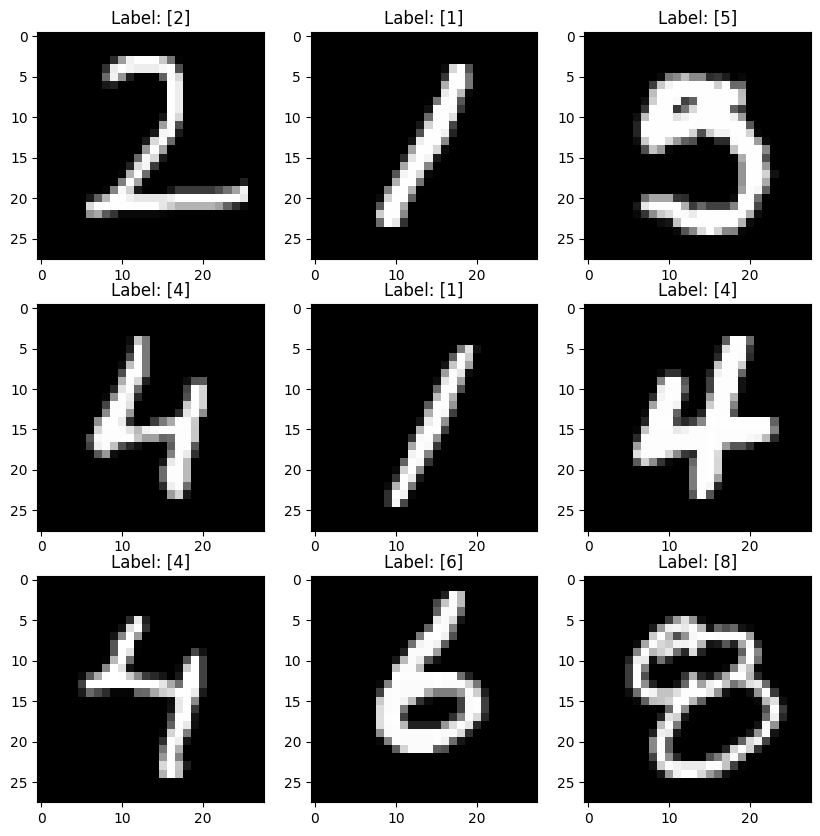

In [18]:
plt.figure(figsize=(10,10))
for i in range(0,9):
    sample_img = x_digits_train[i];
    # plot the image
    plt.subplot(3,3,i+1)
    plt.imshow(sample_img,cmap="gray")
    plt.title ("Label: %s"%np.where(y_digits_train[i]));

In the next few cells we reshape the train and test dataset to be a 4 dim array. We have grayscale images and only one channel so we add one channel in the last dim. We define a neural network with keras, it has two fully connected layers with 500 and 50 nodes with the relu activation function. The last layer has 10 nodes and the softmax activation function, so we can interpret the output as probability for the predicted label. 

In [19]:
x_digits_train=x_digits_train.reshape((len(x_digits_train),28,28,1))
x_digits_test=x_digits_test.reshape((len(x_digits_test),28,28,1))

print(x_digits_train.shape)
print(x_digits_test.shape)


(10000, 28, 28, 1)
(10000, 28, 28, 1)


In [20]:
# Define model architecture
model_digits = Sequential()

model_digits.add(Input(shape=(28,28,1)))
model_digits.add(Flatten())
model_digits.add(Dense(500, activation='relu'))
model_digits.add(Dense(50, activation='relu'))
model_digits.add(Dense(10, activation='softmax'))
 
# Compile model
model_digits.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])


In [21]:
model_digits.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 500)            │       392,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 50)             │        25,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │           510 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 418,060 (1.59 MB)

 Trainable params: 418,060 (1.59 MB)

 Non-trainable params: 0 (0.00 B)

In the next two cells we evaluate the untrained model. As you can see the predictions of the untrained model are completely random, we have an accuracy of around 10%. If you look at single image preditions, you see that the predictions are random and wrong for most of the time. This will change when we train the model with our training dataset. To visualize the trainig process, the computational graph and development of the weights you can use Tensorboard.

In [22]:
# evaluation of the untrained model
model_digits.evaluate(x_digits_test,y_digits_test)
# you get the loss "categorical_crossentropy" and the accuracy 

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.0640 - loss: 2.3842


[2.3839404582977295, 0.07639999687671661]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
predicted probabilities [[0.08785659 0.11592799 0.08697145 0.08695806 0.11599507 0.07643355
  0.0756833  0.09017312 0.1349033  0.12909752]]
max probability 0.1349033
predicted label 8
true label 7


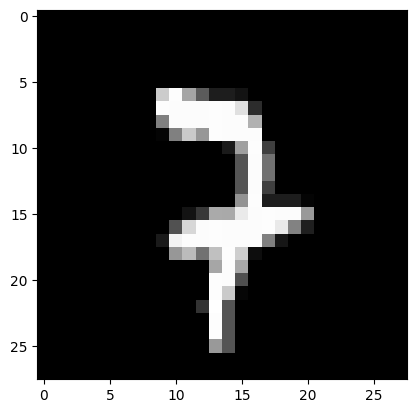

In [23]:
# prediction of an image with the untrained model
i=np.random.choice(range(0,len(x_digits_test)))
plt.imshow(x_digits_test[i,:,:,0],cmap="gray")
pred=model_digits.predict(x_digits_test[i:i+1])
print("predicted probabilities",pred)
print("max probability",np.max(pred))
print("predicted label",np.argmax(pred))
print("true label",np.argmax(y_digits_test[i]))


In [24]:
# Load the TensorBoard notebook extension
%load_ext tensorboard

In [25]:
logdir = os.path.join("logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)

# train the model
history=model_digits.fit(x_digits_train, y_digits_train,
                         validation_data=(x_digits_test,y_digits_test),
                         batch_size=128, epochs=10, verbose=1,
                         callbacks=[tensorboard_callback])

Epoch 1/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - accuracy: 0.6892 - loss: 1.0693 - val_accuracy: 0.9079 - val_loss: 0.3205
Epoch 2/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9232 - loss: 0.2652 - val_accuracy: 0.9290 - val_loss: 0.2381
Epoch 3/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9509 - loss: 0.1768 - val_accuracy: 0.9365 - val_loss: 0.2090
Epoch 4/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9617 - loss: 0.1277 - val_accuracy: 0.9486 - val_loss: 0.1736
Epoch 5/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9809 - loss: 0.0788 - val_accuracy: 0.9499 - val_loss: 0.1680
Epoch 6/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9809 - loss: 0.0662 - val_accuracy: 0.9496 - val_loss: 0.1612
Epoch 7/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9881 - loss: 0.0469 - val_accuracy: 0.9530 - val_loss: 0.1538
Epoch 8/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9934 - loss: 0.0344 - val_accuracy: 0.9548 - val_loss

In [26]:
# Open Tensorboard

# 1) Local installation 
#  - in your anaconda env, in your project dir, type"tensorboard --logdir logs" 
#  - open browser and goto http://localhost:6006

# 2) Google Colab 
#  - show tensorboard inline
%tensorboard --bind_all --logdir logs

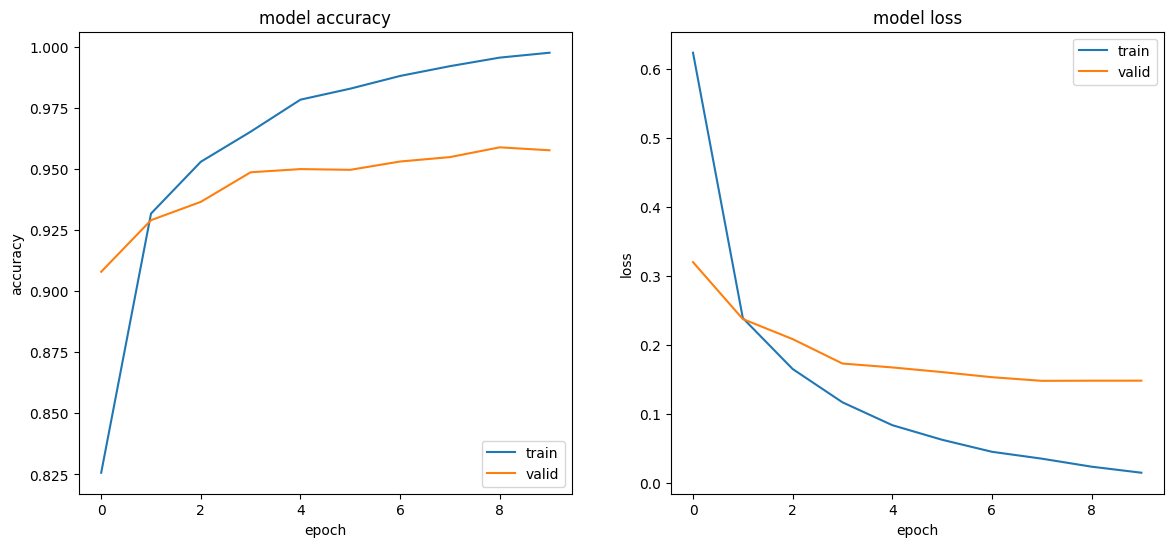

In [27]:
# summarize history for accuracy
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='lower right')
plt.subplot(1,2,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper right')
plt.show()

In [28]:
# evaluation of the trained model
model_digits.evaluate(x_digits_test,y_digits_test)
# you get the loss "categorical_crossentropy" and the accuracy 

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9530 - loss: 0.1683


[0.14882266521453857, 0.9575999975204468]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
predicted probabilities [[1.8333521e-04 1.1868104e-02 2.2145231e-01 2.1755323e-04 4.3096194e-01
  2.5534770e-03 1.5908906e-01 1.4567454e-02 1.5020865e-01 8.8980636e-03]]
max probability 0.43096194
predicted label 4
true label 9


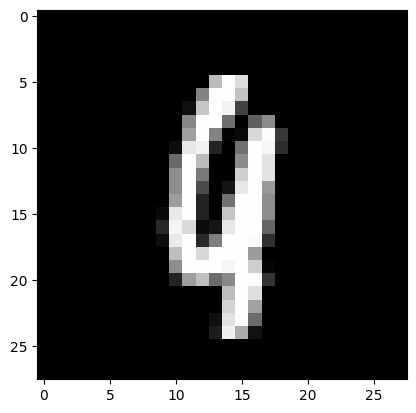

In [29]:
# prediction of an image with the trained model
i=np.random.choice(range(0,len(x_digits_test)))
plt.imshow(x_digits_test[i,:,:,0],cmap="gray")
pred=model_digits.predict(x_digits_test[i:i+1])
print("predicted probabilities",pred)
print("max probability",np.max(pred))
print("predicted label",np.argmax(pred))
print("true label",np.argmax(y_digits_test[i]))


In the next cells we calculate the accuracy on the test dataset and look at the confusion matrix. We have an accuracy of around 95% which is already very good

In [30]:
from sklearn.metrics import confusion_matrix

predict=model_digits.predict(x_digits_test) 
predict_classes=np.argmax(predict,axis=1)
true_classes=np.argmax(y_digits_test,axis=1)
confusion_matrix(true_classes,predict_classes)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


array([[ 957,    0,    3,    2,    0,    2,   12,    1,    2,    1],
       [   0, 1121,    3,    1,    0,    0,    3,    0,    7,    0],
       [   4,    1,  995,    4,    4,    1,    5,    7,   10,    1],
       [   0,    3,   15,  958,    0,   16,    1,    4,    9,    4],
       [   1,    3,    4,    0,  947,    0,    8,    1,    5,   13],
       [   4,    1,    1,   13,    2,  845,   13,    1,   10,    2],
       [   5,    3,    2,    0,    7,    6,  929,    0,    5,    1],
       [   0,    9,   23,    7,    2,    1,    0,  970,    3,   13],
       [   3,    1,    9,   13,    6,   12,    5,    8,  912,    5],
       [   2,    8,    2,    9,   18,    7,    2,   14,    5,  942]])

In [31]:
print(np.average(true_classes==predict_classes)) #this should again be accuracy

0.9576


### Now it's your turn

Train the same neural network with fewer and more training data. train with 100,1000 and the full training data. Look at the learning curves of each model and evaluate the performace on the test dataset, what do you observe? Play around with the nr of the hidden layer and with the nr of nodes. What do you observe?  
*Hint: You might need to train for more than just 10 epochs*

In [32]:
# your code here